## From scratch.  To make an "A" array.

Create the image by loading a fint file and rendering a letter.

In [1]:
from PIL import ImageDraw,Image,ImageFont
import numpy as np

def make_text_image_array(unicode_text, font_file=None,font_dir= r'/System/Library/Fonts/',
                          font_family='SFNS', font_weight= 'Mono', font_type = 'ttf',
                          sz=48,w_marg=40,h_marg=40,use_pil_default=False):
    """
    So far this has only been tested on True Type fonts and the ImageFont.truetype
    font creation function, whose name suggests it is limited to True Type formats.
    
    The default font is only expected to be locatable on a Mac, but has not been 
    tested in different Mac environments. /Library/Fonts/ does not seem to be 
    where  default Mac .ttf fonts are found.  The rest are in /System/Library/Fonts.
    There are Symbol and Dingbat ttf fonts there as well.  
    
    """
    global font
    if font_file is None:
        base = f'{font_family}{font_weight}.{font_type}'
        font_file = os.path.join(font_dir, base)
        print(f'Using default font {font_file}')
    if use_pil_default:
        font = ImageFont.load_default()
    else:
        font = ImageFont.truetype(font_file, sz, encoding="unic")
    try:
        text_width, text_height = font.getsize(unicode_text)
    except AttributeError:
        sz = font.size
        text_width, text_height = sz,sz
    canvas = Image.new('RGB', (text_width + 20, text_height + 20), "white")
    # Make an artist instance linked to that canvass
    draw = ImageDraw.Draw(canvas)
    draw.text((10,10), unicode_text, 'blue', font)    
    img_arr = np.array(canvas.im)
    (width,height) = canvas.size
    # Transposing gives inverted letter
    return img_arr[:,0].reshape(height,width).T

def img_array_to_coords(img_array, xdelta = -10, ydelta=60):
    """
    Convert to coords.
    
    Reflect the image on the X-axis (because the letter will be inmverted).
    
    Add enough delta to bring the entire letter above the X axis.
    """
    (r,c) = img_array.shape
    # 255 = white.  Get the coords of the non white pixels
    coords = [(i,j) for i in range (r) for j in range(c) if img_array[i,j] < 255]
    xvals,yvals = zip(*coords)
    #xvals,yvals = np.array(xvals)+xdelta,np.array(yvals)+ydelta
    #  We subtract the ydeltas because we're doing this BEFORE the reflection
    #  A positive ydelta WILL turn into an upward movement after reflection
    U = np.vstack([np.array(xvals)+xdelta,np.array(yvals)-ydelta])
    # Reflection transformation: reflect on X-axis to get rightside up A
    Rf = np.array([[1,0],[0,-1]])
   
    return Rf.dot(U) #+ delta
 

Make the image into an array

In [3]:
import os.path

font_dir = r'/Library/Fonts/'
font_file = os.path.join(font_dir, 'Arial Unicode.ttf')
unicode_text, sz, w_marg, h_marg= 'B', 48, 40, 40
img_arr = make_text_image_array(unicode_text, font_file, sz=sz,w_marg=w_marg,h_marg=h_marg)
#img_arr = make_text_image_array(unicode_text, sz=sz,w_marg=w_marg,h_marg=h_marg,use_pil_default=True)
#img_arr = make_text_image_array(unicode_text, sz=sz,w_marg=w_marg,h_marg=h_marg)

# Plot the image defined by the array by extracting the pixel coords of
# the non white points.
V = img_array_to_coords(img_arr)

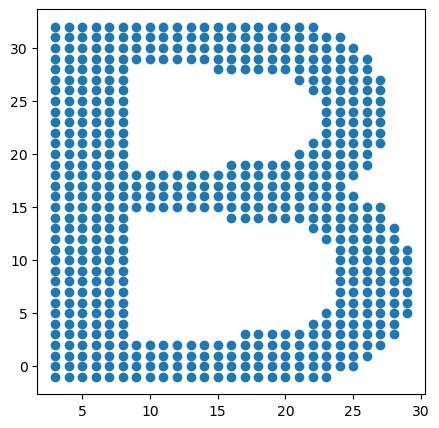

In [4]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 1, figsize = (5,5),)
ax.scatter(V[0,:], V[1,:])

## Other font types

See [PIL font docs](https://python.developpez.com/cours/pilhandbook/php/imagefont.php)

In [21]:
import PIL
from PIL import ImageDraw,Image,ImageFont

import os.path
pref = os.environ['HOME']
python_path = 'opt/anaconda3/lib/python3.7/'
matplotlib_fonts = 'site-packages/matplotlib/mpl-data/fonts'

use_matplotlib_font = True

# Neither of afm examples works, ImageFiont,load complains that it cant find 
# glyph data file.  So this format doesnt work.  Possibly a I cant create 
# bitmap font files from 'afm" files (using mktexpk, mktexmf, mktextmf)
# font_type,font_file = 'afm','cmex10.afm'
# font_type,font_file = 'pdfcorefonts','Helvetica.afm'
##################################################################
# Type1 font does not work
#font_type = 'courier'
#font_dir = '/usr/local/texlive/2019/texmf-dist/fonts/type1/adobe/courier'
#font_file = 'pcrb8a.pfb'
##################################################################
# pk font does not work
font_type = 'pk'
font_dir = '/usr/local/texlive/2019/texmf-dist/fonts/pk/ljfour/public/cm/dpi600'
font_file = 'cmbx10.pk'
##################################################################

if use_matplotlib_font:
    font_type = 'ttf'
    font_file = "DejaVuSans.ttf"
    font_dir = os.path.join(pref, python_path, matplotlib_fonts, font_type)
    
font_path = os.path.join(font_dir, font_file)
print(font_path,os.path.isfile(font_path))

if font_type == 'ttf':
    font = ImageFont.truetype(font_path)
else:
    try:
        font = ImageFont.load(font_path)
    except:
        print('Loading default')
        font = ImageFont.load_default()

/Users/gawron/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf True


## Alternative way

This requires saving an image file and restoring as PIL imgae.

In [27]:
import numpy as np
from PIL import ImageDraw,Image,ImageFont

def alt_make_text_image_array(unicode_text, font_file=None,font_dir= r'/Library/Fonts/',
                          font_family='Arial', font_type = 'ttf',
                          sz=48,w_marg=40,h_marg=40,save_file='test.png'):
    if font_file is None:
        base = r'{font_family} Unicode.{font_type}'
        font_file = os.path.join(font_dir, base)
    font = ImageFont.truetype(font_file, sz, encoding="unic")
    try:
        text_width, text_height = font.getsize(unicode_text)
    except AttributeError:
        sz = font.size
        text_width, text_height = sz,sz
    canvas = Image.new('RGB', (text_width + 20, text_height + 20), "white")
    # Make an artist instance linked to that canvass
    draw = ImageDraw.Draw(canvas)
    draw.text((10,10), unicode_text, 'blue', font) 
    canvas.save(save_file)
    img_array = np.array(Image.open(save_file))
    return img_array[:,:,0].T
 

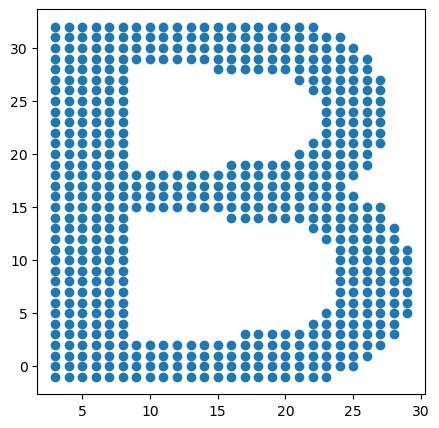

In [34]:
import os.path
from matplotlib import pyplot as plt

font_dir = r'/Library/Fonts/'
font_file = os.path.join(font_dir, 'Arial Unicode.ttf')
unicode_text, sz, w_marg, h_marg= 'B', 48, 40, 40
A_img = alt_make_text_image_array(unicode_text, font_file, sz=sz,w_marg=w_marg,h_marg=h_marg)
V = img_array_to_coords(A_img)

fig, ax = plt.subplots(1, 1, figsize = (5,5),)
ax.scatter(V[0,:], V[1,:])

## Linear Mappings on the image

In [29]:
def plot_mapping (X,Y, LX, LY, name = 'L',figsize=(10,5),just_one_axis=False):
    """
    X: A an array of the X vals to be mapped, Y: an array of the Y vals.
    
    LX, LY the same for the mapped points.
    
    Gives a 1 x 2 display; show the input points next to their mapping.
    
    
    """
    if just_one_axis:
        fig, ax1 = plt.subplots(1, 1, figsize = figsize)
        ax2 = ax1
        ax1.set_title('Before and After {0}'.format(name))
    else:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize = figsize,
                                    sharey=True,sharex=True)
        ax1.set_title('Before {0}'.format(name))
        ax2.set_title('After {0}'.format(name))
    ax1.scatter(X,Y)
    ax2.scatter(LX,LY)

def rotation_matrix (theta):
    return np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])


def reflection_matrix (theta):
    """
    If R_{\theta} is rotation by theta and T_{x} is reflection across the x-axis, then reflection is
    
    R_{\theta} T_{x}  R_{-\theta}
    
    Once the matrix multiplications for these three transformations are carried out, this turns
    out to be equivalent to the following matrix.
    """
    two_theta = 2*theta
    cos_two_theta,sin_two_theta = np.cos(two_theta),np.sin(two_theta)
    return np.array([[cos_two_theta,sin_two_theta],[sin_two_theta, - cos_two_theta]])

def make_meshgrid (xmin=0, xmax=1, ymin=0, ymax=1, nx=25, ny=25):

    """
    Makes a grid (a numpy 2D array).  Default: 25x25 (=625) grid 
    points.
    
    default values for xmin,xmax,ymin,ymax give unit square.
    """
    x,y = np.linspace(xmin, xmax, nx), np.linspace(ymin, ymax, ny)
    # Return A pair: Xcoords,Ycoords of all points in the grid
    return np.meshgrid(x, y)


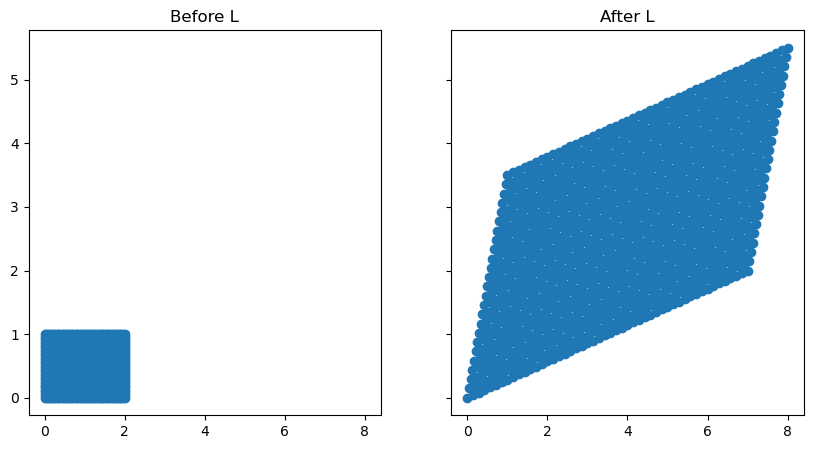

In [30]:
L = np.array([[3.5,1],[1,3.5]])
xvals, yvals = make_meshgrid (xmin=0,xmax=2,ymin=0,ymax = 1,nx =50)
U = np.vstack([np.ravel(xvals),np.ravel(yvals)])
V = L.dot(U)
plot_mapping (xvals, yvals, V[0,:], V[1,:])

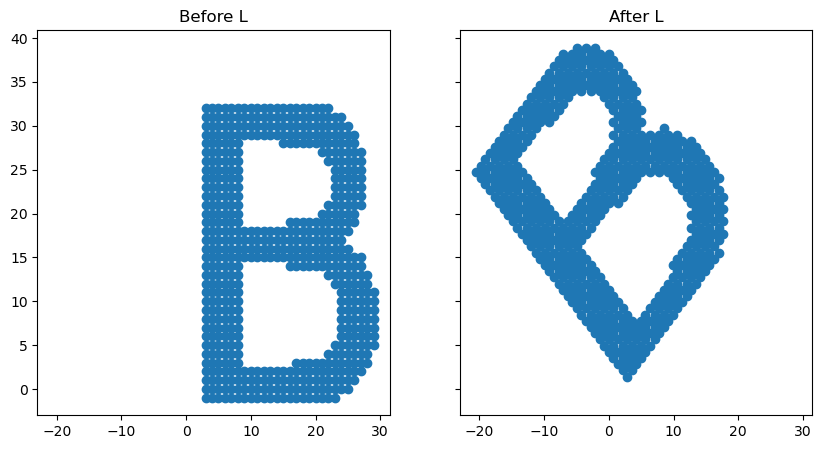

In [36]:
theta = np.pi/4
R = rotation_matrix(theta)
xvals,yvals = V[0,:], V[1,:]
U = np.vstack([np.ravel(xvals),np.ravel(yvals)])
V = R.dot(U)
#V2 = R.dot(V)
plot_mapping (xvals, yvals, V[0,:], V[1,:])
#plot_mapping (V[0,:], V[1,:],V2[0,:],V2[1,:])

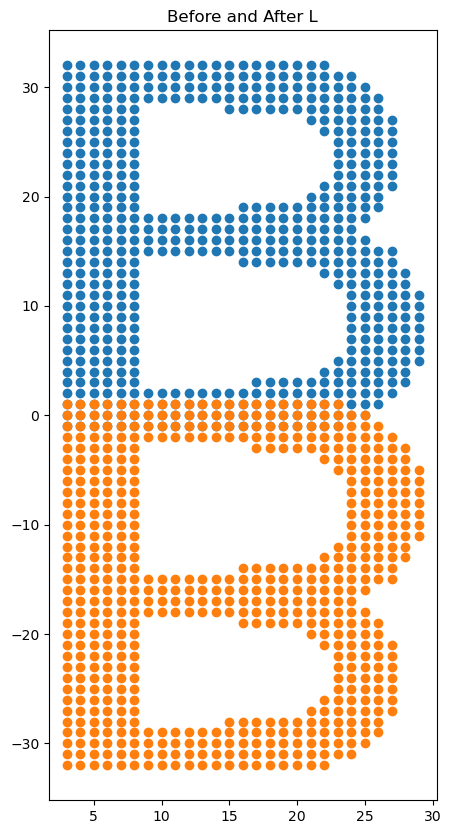

In [35]:
theta = np.pi
Rf = reflection_matrix(theta)
xvals,yvals = V[0,:], V[1,:]
U = np.vstack([np.ravel(xvals),np.ravel(yvals)])
Vr = Rf.dot(U)
plot_mapping (xvals, yvals, Vr[0,:], Vr[1,:],figsize=(5,10),just_one_axis=True)

## Using latex fonts

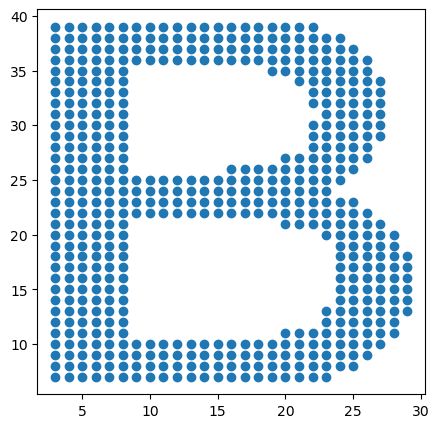

In [44]:
import os.path
from matplotlib import pyplot as plt

font_dir = r'/usr/local/texlive/2022/texmf-dist/fonts/truetype'
# invalid charmap handle
#font_file = os.path.join(font_dir, 'marvosym','marvosym.ttf')
# All of these work!
#group, source, family, style = 'public','gnu-freefont','FreeMono',''
#group, source, family, style = 'public','gnu-freefont','FreeMono','Bold'
#group, source, family, style = 'public','padauk','Padauk-','Regular'
#group, source, family, style = 'public','padauk','PadaukBook-','Regular'
#group, source, family, style = 'public','padauk','PadaukBook-','Bold'
#group, source, family, style = 'intel','clearsans','ClearSans-','Bold'
#group, source, family, style = 'intel','clearsans','ClearSans-','Regular'
#group, source, family, style = 'intel','clearsans','ClearSans-','Medium'
#group, source, family, style = 'intel','clearsans','ClearSans-','Light'
#group, source, family, style = 'intel','clearsans','ClearSans-','Thin'
#group, source, family, style = 'intel','clearsans','ClearSans-','Italic'
#group, source, family, style = 'intel','clearsans','ClearSans-','BoldItalic'
#group, source, family, style = 'google','arimo','Arimo-','BoldItalic'
group, source, family, style = 'google','arimo','Arimo-','Regular'
font_file= os.path.join(font_dir, group, source, f'{family}{style}.ttf')
unicode_text, sz, w_marg, h_marg= 'B', 48, 40, 40
img_arr = make_text_image_array(unicode_text, font_file, sz=sz,w_marg=w_marg,h_marg=h_marg)
V = img_array_to_coords(img_arr)

fig, ax = plt.subplots(1, 1, figsize = (5,5),)
ax.scatter(V[0,:], V[1,:])

## Working on a pre-existing image

In [8]:
from PIL import ImageDraw,Image,ImageFont
# Will work on a Mac (but check this filepath)
font_file = r'/Library/Fonts/Arial Unicode.ttf'
font = ImageFont.truetype(font_file,70)
fn = "me_beating_wrodlebot.png"   #fn =  '1200px-Rtriangle.svg.png'
image = Image.open(f'/Users/gawron/Desktop/{fn}')
draw = ImageDraw.Draw(image) 
unicode_text = u"SMILE WORLD!" 
draw.text((10, 20), unicode_text, font = font) 
image.show()